<a href="https://colab.research.google.com/github/NurlailyAsrobika16/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas. 


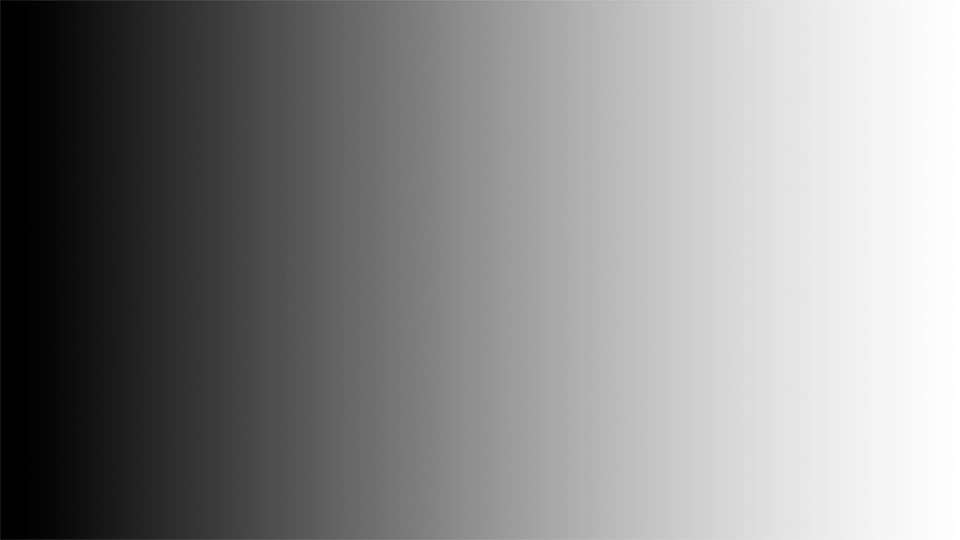

In [5]:
# Load image
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg')
cv2_imshow(img)

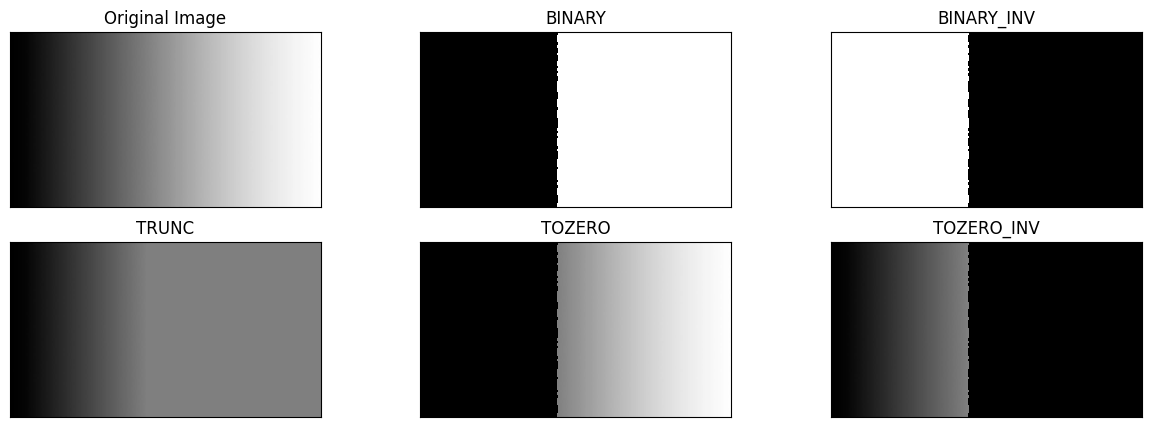

In [6]:
thresh = 127 
#nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-8-0c01575a098d>:19: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb


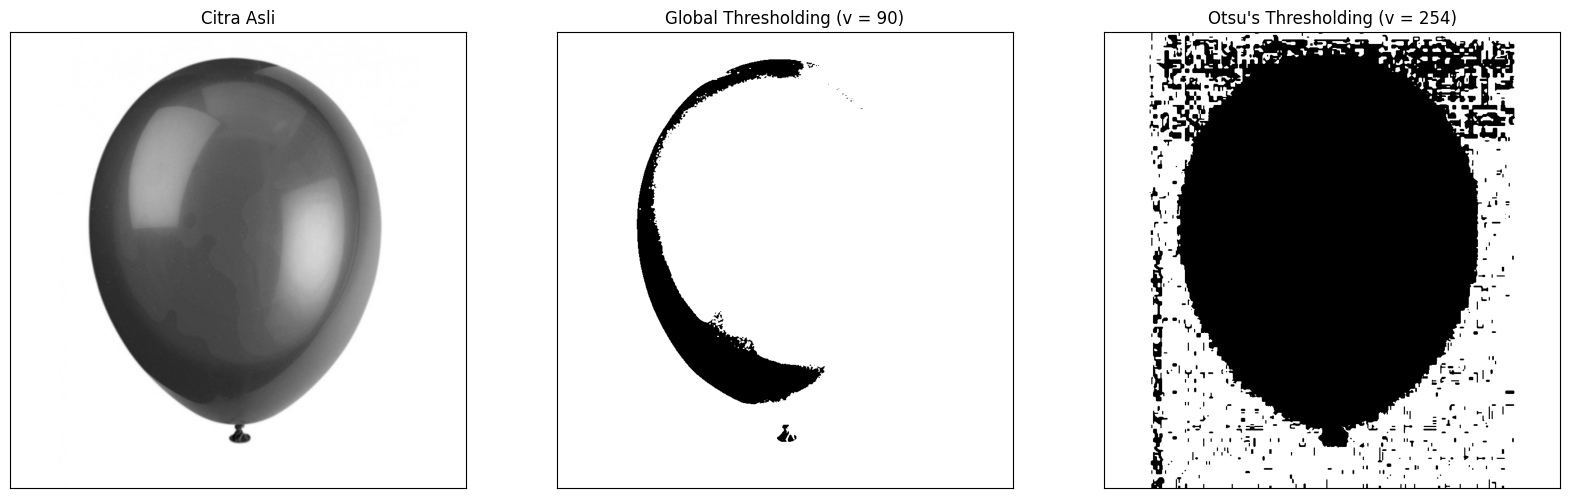

In [8]:
# Otsu Thresholding tanpa menggunakan Librar
img_lgs = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/balloon.jpg', 0)
blur = cv.GaussianBlur(img_lgs, (5,5),0)
hist = cv.calcHist([blur],[0],None,[256], [0,256])

hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1

for i in range(0,255):
  wb += hist[i]
  wf = (img_lgs.shape[0]*img_lgs.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blur, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()